In [1]:
%run prophet_funcs_v1.py

In [130]:
import pandas as pd
import time
from datetime import timedelta

#get the time now in unix time
now = int(time.time())

#get the time one year from now datetime object
day_lag = datetime.today() - timedelta(days = 120 )

#convert datetime object to unix timestamp
then = int(day_lag.timestamp())

url = {
    'SOL': F'https://query1.finance.yahoo.com/v7/finance/download/SOL1-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'ETH': F'https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'XRP': F'https://query1.finance.yahoo.com/v7/finance/download/XRP-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true',
    'BTC': F'https://query1.finance.yahoo.com/v7/finance/download/BTC-USD?period1={then}&period2={now}&interval=1d&events=history&includeAdjustedClose=true'
}




In [131]:
'''Function to fetch data from yahoo via url dictionary of Ticker and Url'''

def fetchData(url):
    df = pd.DataFrame()
    for i in url.items():
        key = i[0] #get the Key values from dictionary in this case Crypto Ticker
        val = i[1] #get the Value object from dictionary in this case Crypto Url
        data = pd.read_csv(val)
        data = data.assign(token = key) 
        df = df.append(data)
    return(df)


df2 = fetchData(url)

# Try yFinance yahoo api

In [23]:
import yfinance as yf
import pandas as pd

tickerStrings = ['SOL1-USD']

#start = 
period = '1y'

vars = tickerStrings,period

def FetchData(vars):
    tickerStrings,period = vars
    df_list = list()
    for ticker in tickerStrings:
        data = yf.download(ticker, group_by="Ticker", period = period)
        data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
        df_list.append(data)
        df = pd.concat(df_list) # combine all dataframes into a single dataframe
    return(df)
                                

df = FetchData(vars)

[*********************100%***********************]  1 of 1 completed


In [3]:
#Create a dictionary that contains the data for each ticker from the original data pull
def get_splited_df_dict(df: 'df', split_column: 'ticker'):
    """
    splits a pandas.DataFrame on split_column and returns it as a dict
    """

    df_dict = {value: df[df[split_column] == value].drop(split_column, axis=1) for value in df[split_column].unique()}

    return df_dict


In [4]:
split = get_splited_df_dict(df,'ticker')

In [5]:
'''Below is an example of how to access each dictionary'''
split['ETH-USD'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-02,3308.870361,3464.837402,3260.027588,3391.694336,3391.694336,19202671704
2021-10-03,3390.767578,3484.605713,3348.120117,3418.358643,3418.358643,15516566862
2021-10-04,3418.776367,3434.775391,3283.448730,3380.089111,3380.089111,17747154101
2021-10-05,3381.784424,3541.451660,3365.817627,3518.518555,3518.518555,16632591670
2021-10-06,3516.570312,3622.551270,3354.469727,3580.562012,3580.562012,21855226591


# plots

In [9]:
#try plotly
import plotly.express as px

df_plotly = px.data.stocks()

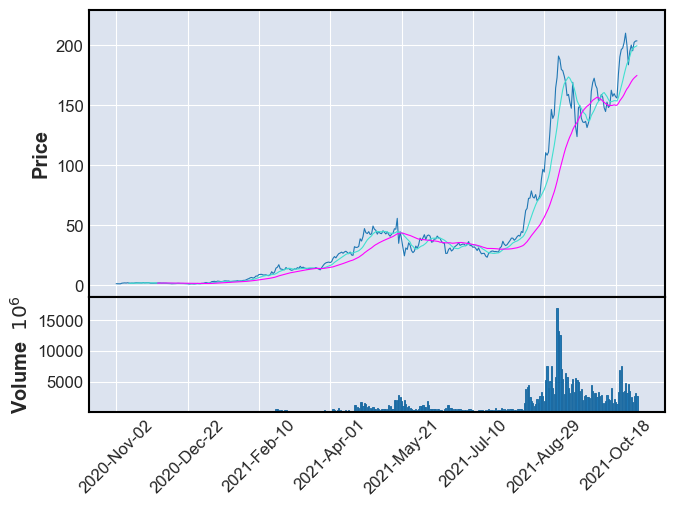

In [27]:
#try mplfinance
import mplfinance as mpf

mpf.plot(df,type = 'line',volume = True,mav = (10,30))